In [1]:
import evaluators
import preprocessors
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA

# hide warnings
import warnings 
warnings.filterwarnings("ignore")


In [2]:
import os
import platform

def beep():
    if platform.system() == "Windows":
        import winsound
        winsound.Beep(1000, 500)  # frequency (Hz), duration (ms)

# Experiment 1 - ARIMA model no tuning

In [3]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [4]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)

In [5]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
dtws = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 97.13244210396272
Median sktime DTW distance for feature O2Sat: 9.550897668042039
Median sktime DTW distance for feature SBP: 353.99731330881735
Median sktime DTW distance for feature MAP: 204.36694224227773
Median sktime DTW distance for feature DBP: 82.47499470872226
Median sktime DTW distance for feature Resp: 35.32351153445662
Median sktime DTW distance for feature Temp: 0.13080430105032953


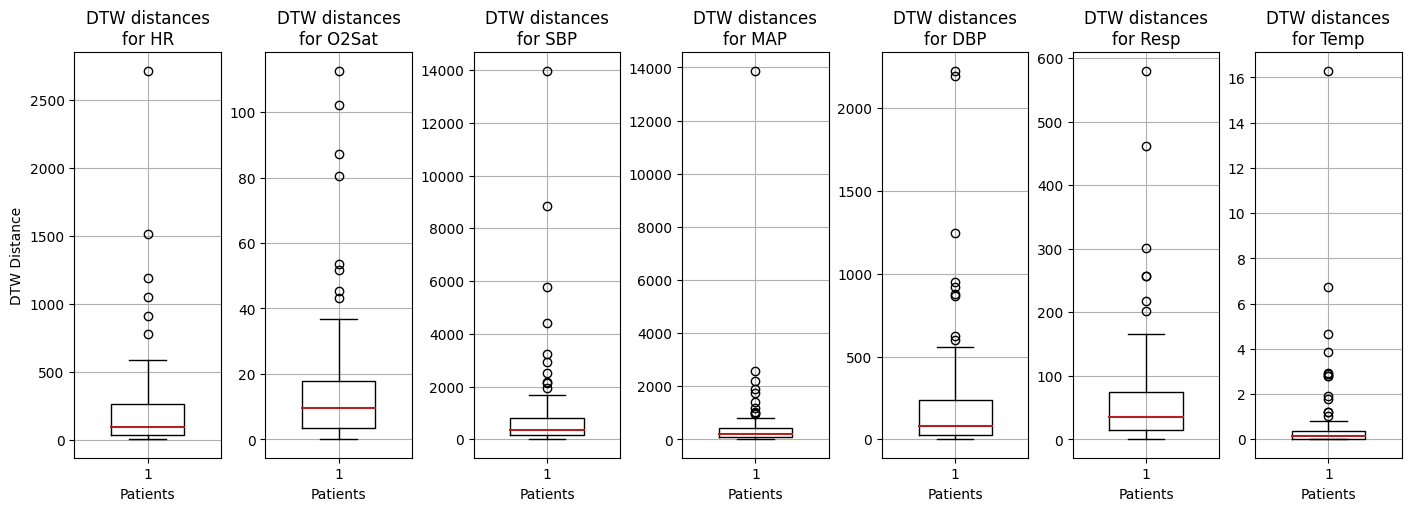

In [6]:
myEvaluator.box_plot_dtw(dtws)

# Experiment 2 - AutoARIMA model

In [7]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [8]:
model = AutoARIMA(seasonal=False, max_order=50, suppress_warnings=True)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon)
beep()

In [28]:
model.get_fitted_params()

{'forecasters':                                                    HR  \
 0   AutoARIMA(max_order=50, seasonal=False, suppre...   
 1   AutoARIMA(max_order=50, seasonal=False, suppre...   
 2   AutoARIMA(max_order=50, seasonal=False, suppre...   
 3   AutoARIMA(max_order=50, seasonal=False, suppre...   
 4   AutoARIMA(max_order=50, seasonal=False, suppre...   
 ..                                                ...   
 92  AutoARIMA(max_order=50, seasonal=False, suppre...   
 93  AutoARIMA(max_order=50, seasonal=False, suppre...   
 94  AutoARIMA(max_order=50, seasonal=False, suppre...   
 95  AutoARIMA(max_order=50, seasonal=False, suppre...   
 96  AutoARIMA(max_order=50, seasonal=False, suppre...   
 
                                                 O2Sat  \
 0   AutoARIMA(max_order=50, seasonal=False, suppre...   
 1   AutoARIMA(max_order=50, seasonal=False, suppre...   
 2   AutoARIMA(max_order=50, seasonal=False, suppre...   
 3   AutoARIMA(max_order=50, seasonal=False, suppre... 

In [9]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 99.38792817315031
Median sktime DTW distance for feature O2Sat: 9.391750714923349
Median sktime DTW distance for feature SBP: 321.1324915028912
Median sktime DTW distance for feature MAP: 225.2071280991729
Median sktime DTW distance for feature DBP: 67.13485569414358
Median sktime DTW distance for feature Resp: 33.57963926309864
Median sktime DTW distance for feature Temp: 0.08000000000000228


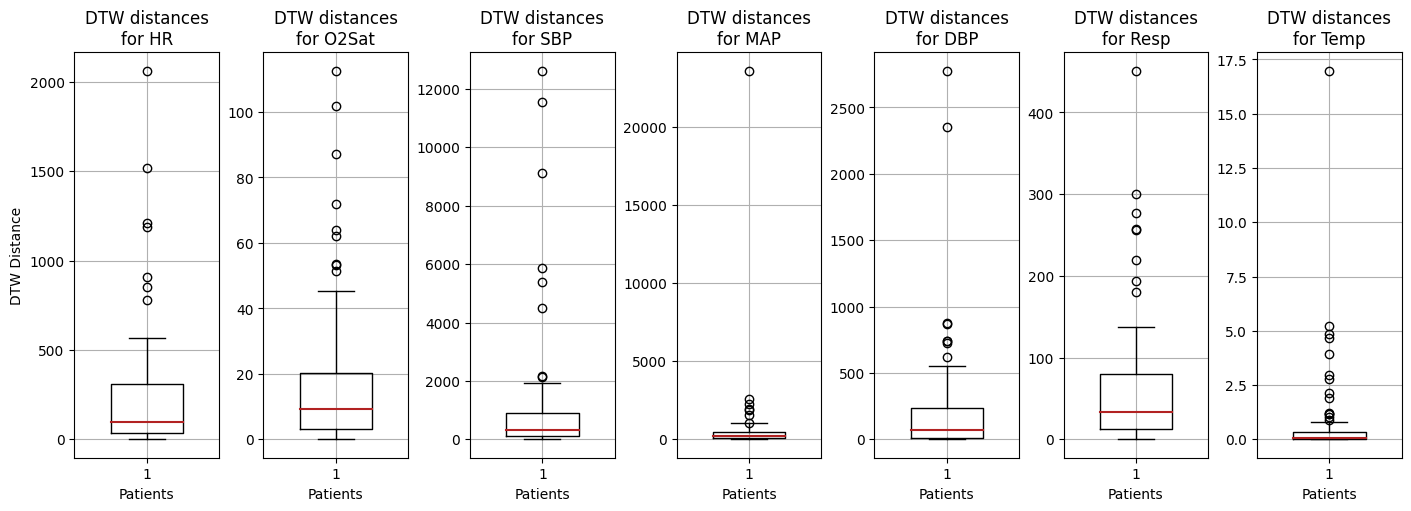

In [10]:
myEvaluator.box_plot_dtw(results)

# Experiment 3 - ARIMA manual tuning

In [15]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [16]:
model = ARIMA(order= (1, 1, 0), maxiter=200)

model.fit(y_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(fh=forecast_horizon)
beep()

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 104.4123504413976
Median sktime DTW distance for feature O2Sat: 8.956735691311621
Median sktime DTW distance for feature SBP: 346.90642072807157
Median sktime DTW distance for feature MAP: 251.57535302324922
Median sktime DTW distance for feature DBP: 79.19978214725951
Median sktime DTW distance for feature Resp: 38.746659550378375
Median sktime DTW distance for feature Temp: 0.07950228972172459


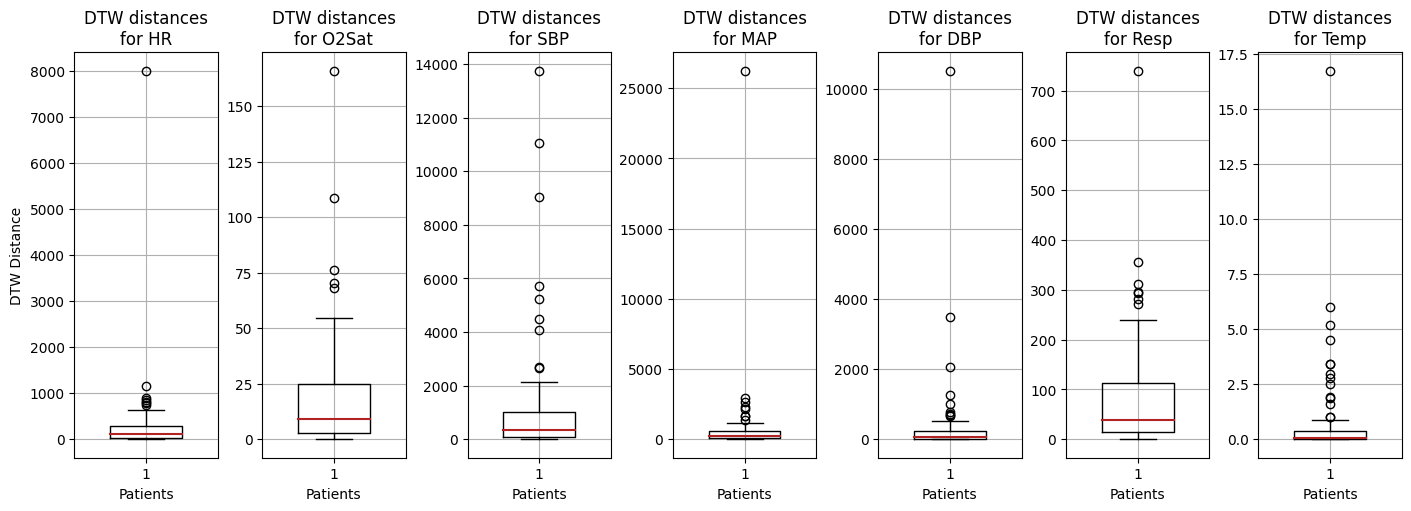

In [18]:
myEvaluator.box_plot_dtw(results)

# Experiment 4 - ARIMA with Exogenous input SBP

In [11]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ["HR", 'O2Sat', 'MAP', 'DBP', 'Resp', 'Temp'], ['SBP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [12]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)
beep()

In [13]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 111.13567170381617
Median sktime DTW distance for feature O2Sat: 8.130536735622599
Median sktime DTW distance for feature MAP: 62.48305828630696
Median sktime DTW distance for feature DBP: 33.32518506350251
Median sktime DTW distance for feature Resp: 34.057795858873284
Median sktime DTW distance for feature Temp: 0.09743001795210479


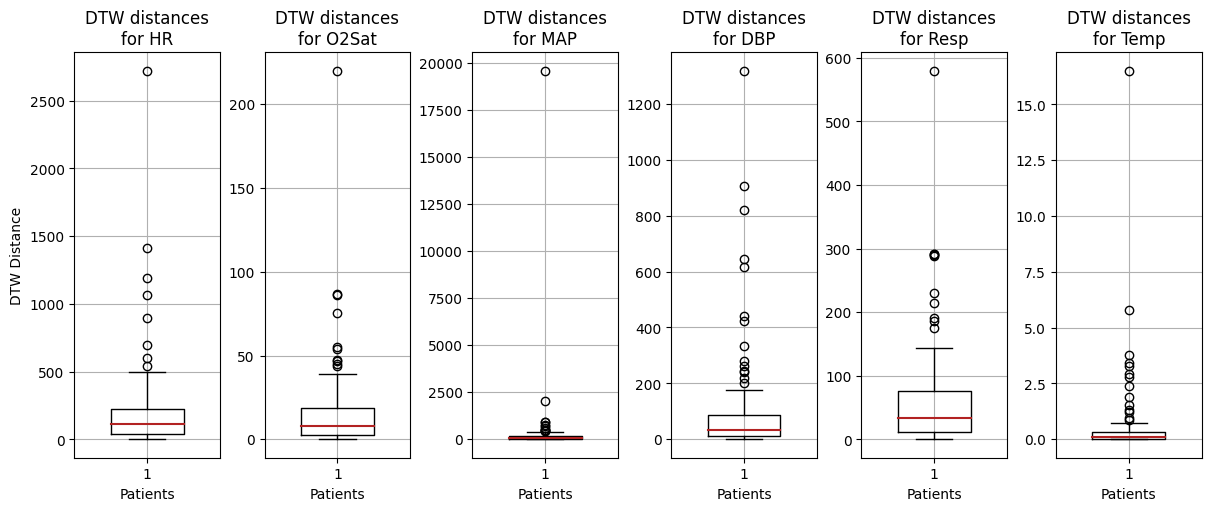

In [14]:
myEvaluator.box_plot_dtw(results)

# Experiment 5 - ARIMA with Exogenous input HR

In [19]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'], ['HR'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [20]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)
beep()

In [21]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature O2Sat: 7.139407267795917
Median sktime DTW distance for feature SBP: 330.16495302024566
Median sktime DTW distance for feature MAP: 183.56255714917478
Median sktime DTW distance for feature DBP: 80.30038562370989
Median sktime DTW distance for feature Resp: 29.71096690028122
Median sktime DTW distance for feature Temp: 0.10728077578334183


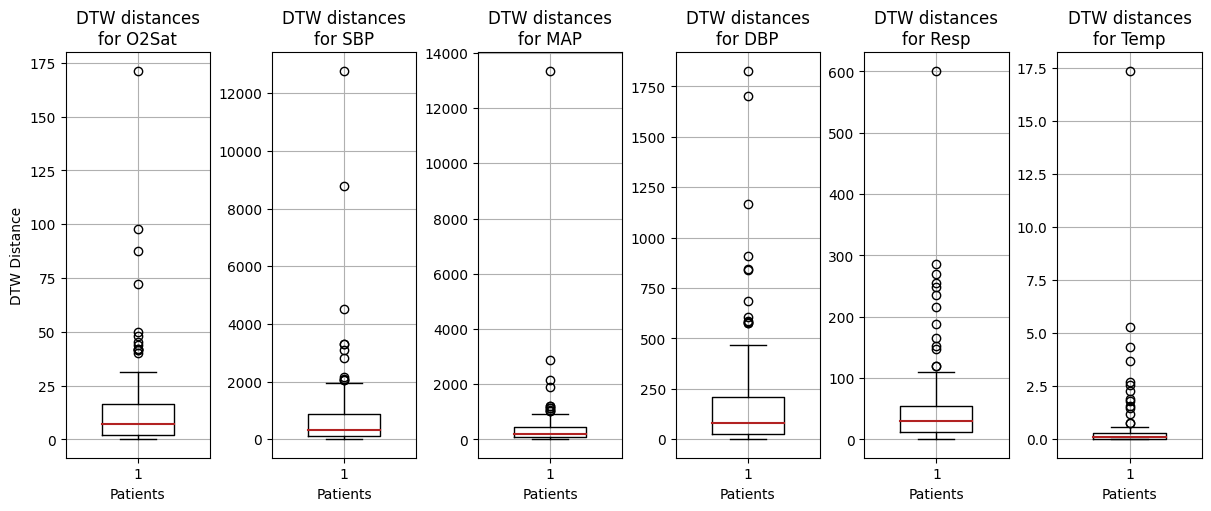

In [22]:
myEvaluator.box_plot_dtw(results)

# ARIMA with exogenous input O2Sat

In [31]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['MAP', 'DBP', 'Resp', 'Temp', 'HR', 'SBP'], ['O2Sat'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [32]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)
beep()

In [33]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 103.54465250566507
Median sktime DTW distance for feature SBP: 395.0675894964901
Median sktime DTW distance for feature MAP: 203.65415166062925
Median sktime DTW distance for feature DBP: 81.36129294798603
Median sktime DTW distance for feature Resp: 35.81873438344685
Median sktime DTW distance for feature Temp: 0.11890791175121111


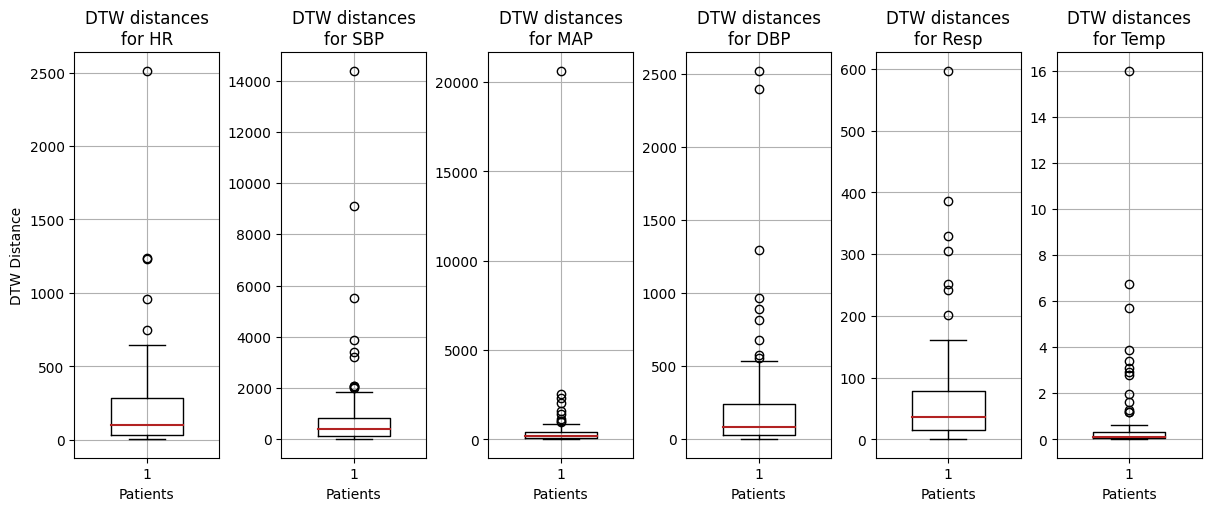

In [34]:
myEvaluator.box_plot_dtw(results)

# ARIMA with exogenous input MAP

In [36]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'DBP', 'Resp', 'Temp', 'HR', 'SBP'], ['MAP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [37]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)

In [38]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 79.92971665242838
Median sktime DTW distance for feature O2Sat: 8.123422215681684
Median sktime DTW distance for feature SBP: 127.57509828901816
Median sktime DTW distance for feature DBP: 28.969016643531887
Median sktime DTW distance for feature Resp: 28.156840647526575
Median sktime DTW distance for feature Temp: 0.09398107833570293


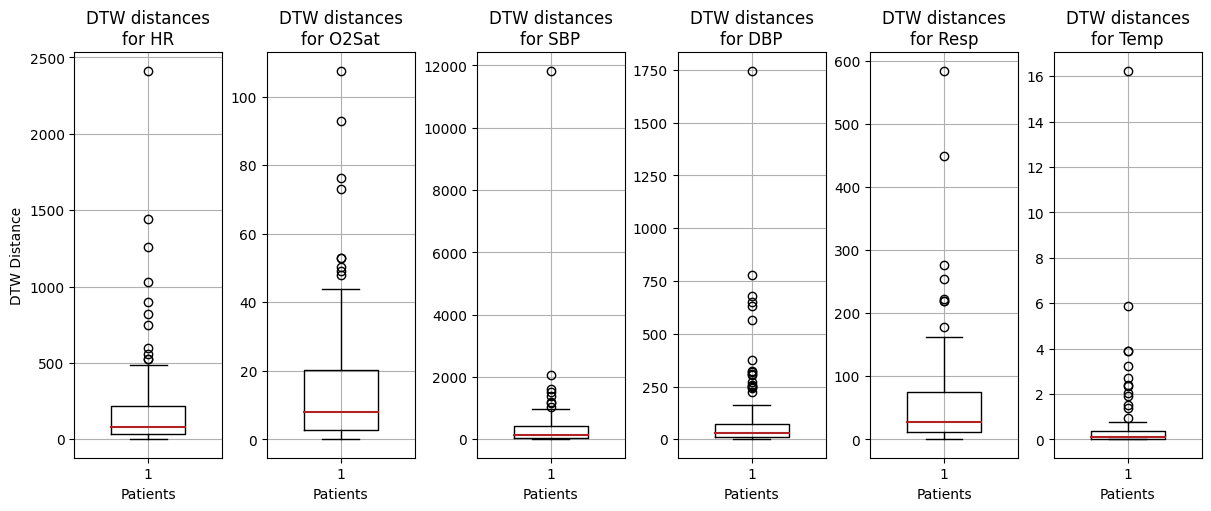

In [39]:
myEvaluator.box_plot_dtw(results)

# ARIMA with exogenous input DBP

In [41]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'MAP', 'Resp', 'Temp', 'HR', 'SBP'], ['DBP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [42]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [43]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 93.75885123694621
Median sktime DTW distance for feature O2Sat: 7.959461289705148
Median sktime DTW distance for feature SBP: 162.27552386373628
Median sktime DTW distance for feature MAP: 70.14160983278825
Median sktime DTW distance for feature Resp: 31.681234551566018
Median sktime DTW distance for feature Temp: 0.09028290857327598


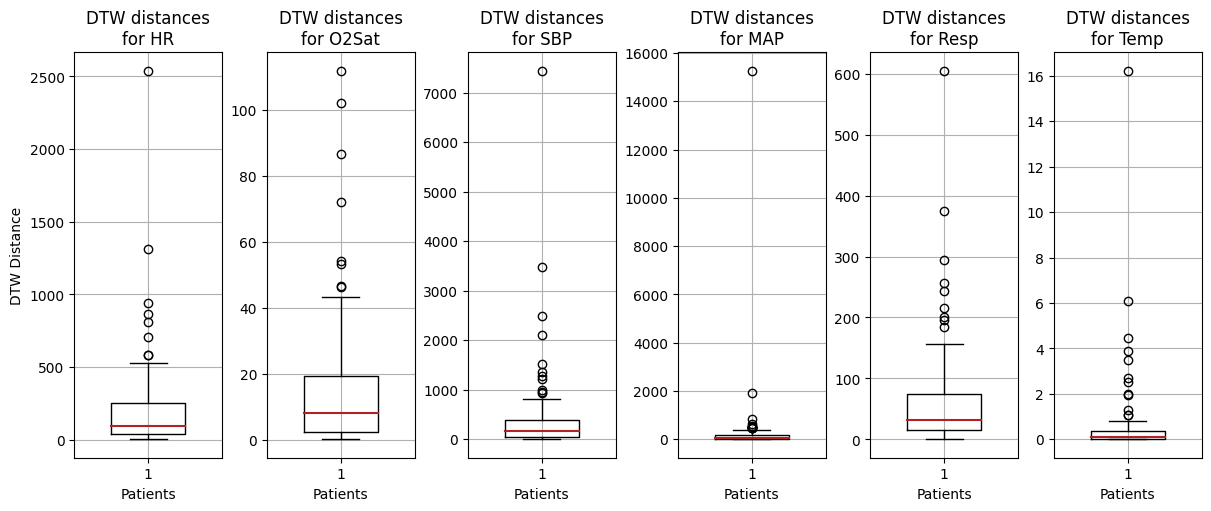

In [44]:
myEvaluator.box_plot_dtw(results)

# ARIMA with exogenous input Resp

In [45]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'MAP', 'DBP', 'Temp', 'HR', 'SBP'], ['Resp'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [46]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [47]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 84.0991319067933
Median sktime DTW distance for feature O2Sat: 8.371407095386104
Median sktime DTW distance for feature SBP: 354.9966346310211
Median sktime DTW distance for feature MAP: 197.7438245588623
Median sktime DTW distance for feature DBP: 84.50584499737252
Median sktime DTW distance for feature Temp: 0.11169334154808117


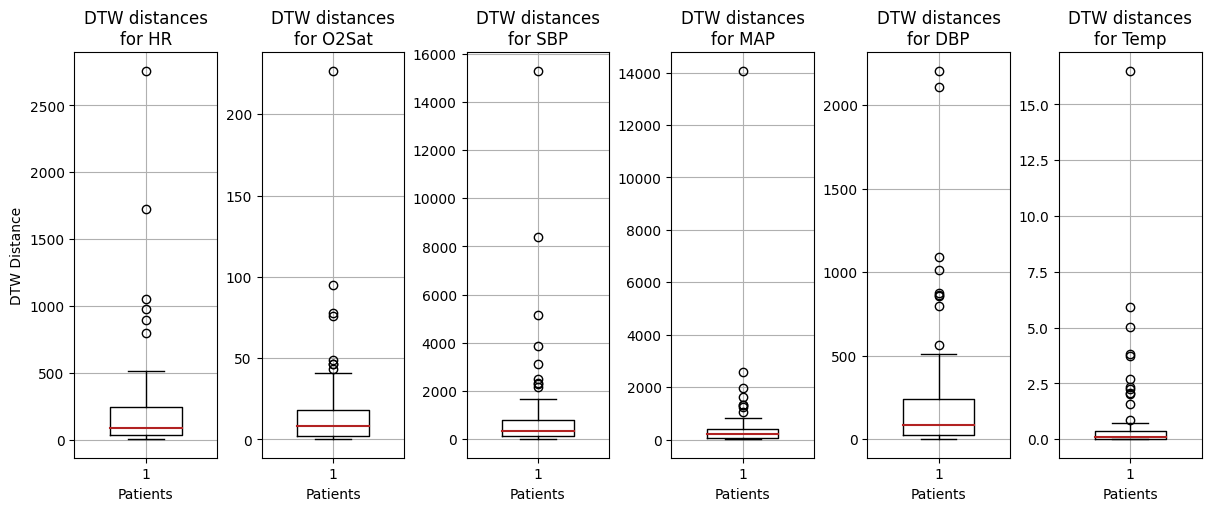

In [48]:
myEvaluator.box_plot_dtw(results)

# ARIMA with exogenous input Temp

In [49]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'MAP', 'DBP', 'Resp', 'HR', 'SBP'], ['Temp'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [50]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [51]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 125.18625535198703
Median sktime DTW distance for feature O2Sat: 8.974327952773091
Median sktime DTW distance for feature SBP: 346.9899141240719
Median sktime DTW distance for feature MAP: 220.74295578076277
Median sktime DTW distance for feature DBP: 84.13642000215496
Median sktime DTW distance for feature Resp: 35.14189101711129


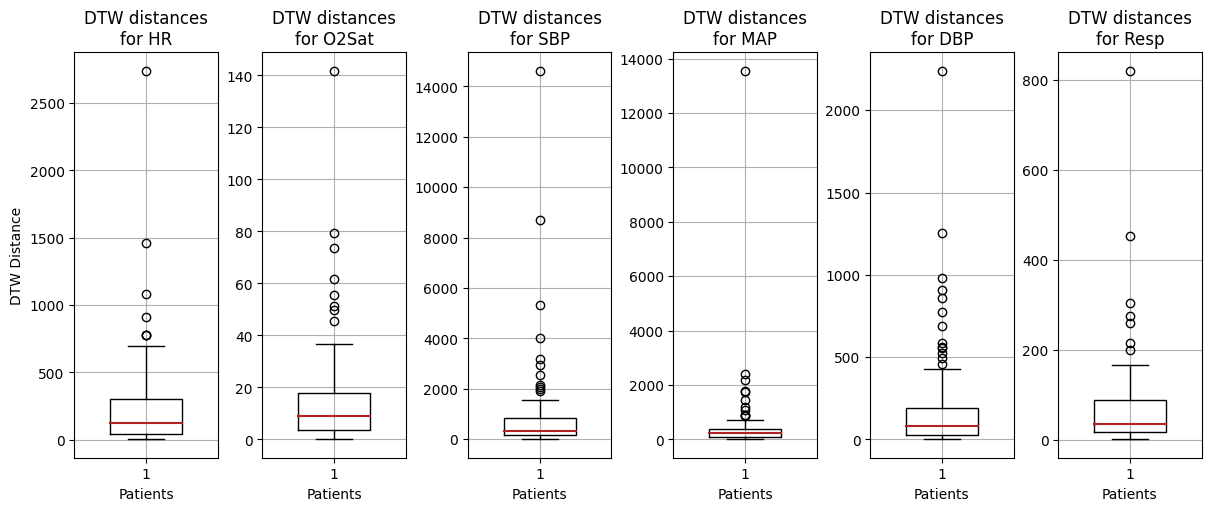

In [52]:
myEvaluator.box_plot_dtw(results)

# ARIMA with MAP and HR

In [66]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'DBP', 'Resp', 'Temp', 'SBP'], ['MAP', 'HR'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [67]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [68]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature O2Sat: 6.477851851637337
Median sktime DTW distance for feature SBP: 139.2974023888737
Median sktime DTW distance for feature DBP: 34.93095747701943
Median sktime DTW distance for feature Resp: 27.049840998180052
Median sktime DTW distance for feature Temp: 0.10232857722731833


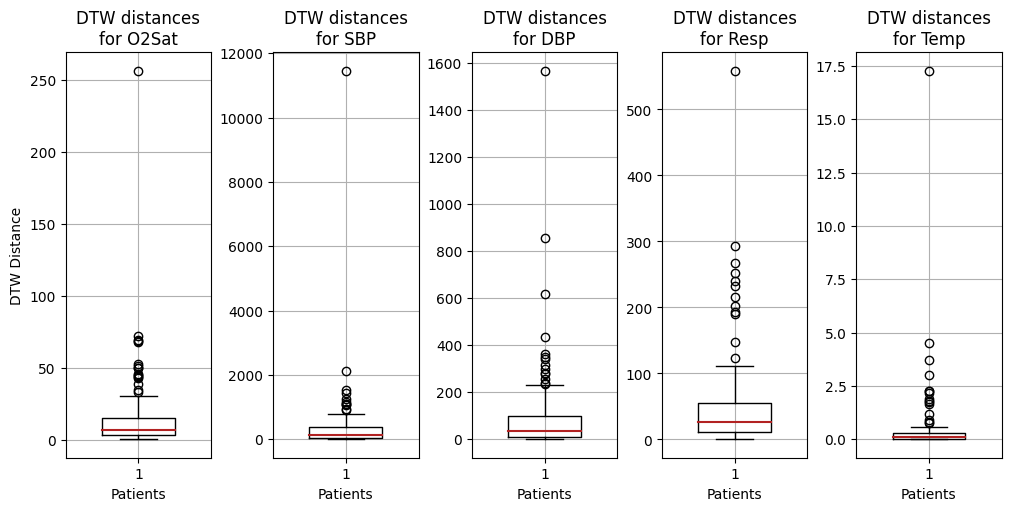

In [69]:
myEvaluator.box_plot_dtw(results)

# ARIMA with HR and SBP

In [57]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'DBP', 'Resp', 'Temp', 'MAP'], ['HR', 'SBP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [58]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [59]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature O2Sat: 6.950372544540617
Median sktime DTW distance for feature MAP: 60.83417869500853
Median sktime DTW distance for feature DBP: 40.46426109787778
Median sktime DTW distance for feature Resp: 26.933657191405814
Median sktime DTW distance for feature Temp: 0.0981890139673713


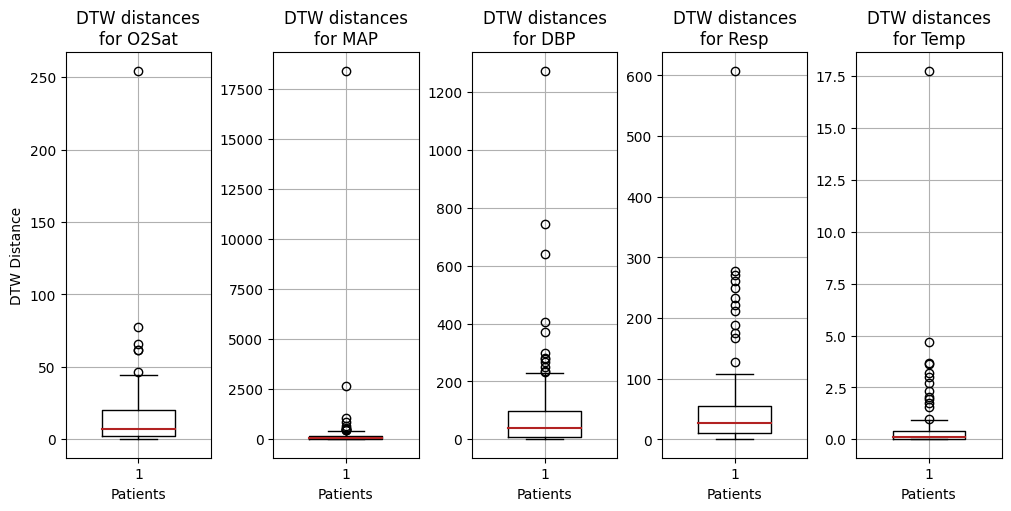

In [60]:
myEvaluator.box_plot_dtw(results)

# ARIMA with DBP and MAP

In [2]:
myLoader = preprocessors.Loader("C:/Users/emily/Documents/DissertationProject/training/training_setA_csv",['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = myLoader.get_panel_df(max_instances=100, min_time_points=30)
df = myLoader.panel_imputer(df, "ffill")
y_train, y_pred = myLoader.split_by_fh(df, 4)
y_train, y_pred, X_train, X_pred = myLoader.split_y_X(y_train, y_pred, ['O2Sat', 'HR', 'Resp', 'Temp', 'SBP'], ['MAP', 'DBP'])

Successfully loaded 100 patients.
Warning - Patient 21: Dropping — constant columns found
Warning - Patient 37: Dropping — constant columns found
Warning - Patient 58: Dropping — constant columns found


In [3]:
model = ARIMA(suppress_warnings=True)

model.fit(y_train, X=X_train)
forecast_horizon = ForecastingHorizon([1, 2, 3, 4], is_relative=True)
forecasts = model.predict(forecast_horizon, X=X_pred)


In [4]:
myEvaluator = evaluators.Evaluator(y_train, y_pred, forecasts)
results = myEvaluator.sktime_dtw()

Median sktime DTW distance for feature HR: 86.30560274470011
Median sktime DTW distance for feature O2Sat: 7.556201001222731
Median sktime DTW distance for feature SBP: 109.55984758548352
Median sktime DTW distance for feature Resp: 29.635542735196992
Median sktime DTW distance for feature Temp: 0.10808595441373414


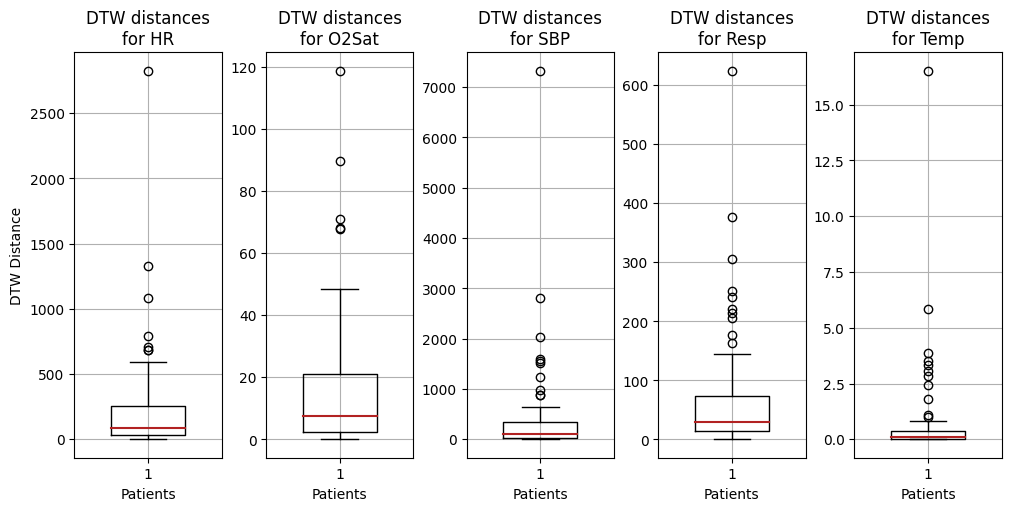

In [65]:
myEvaluator.box_plot_dtw(results)

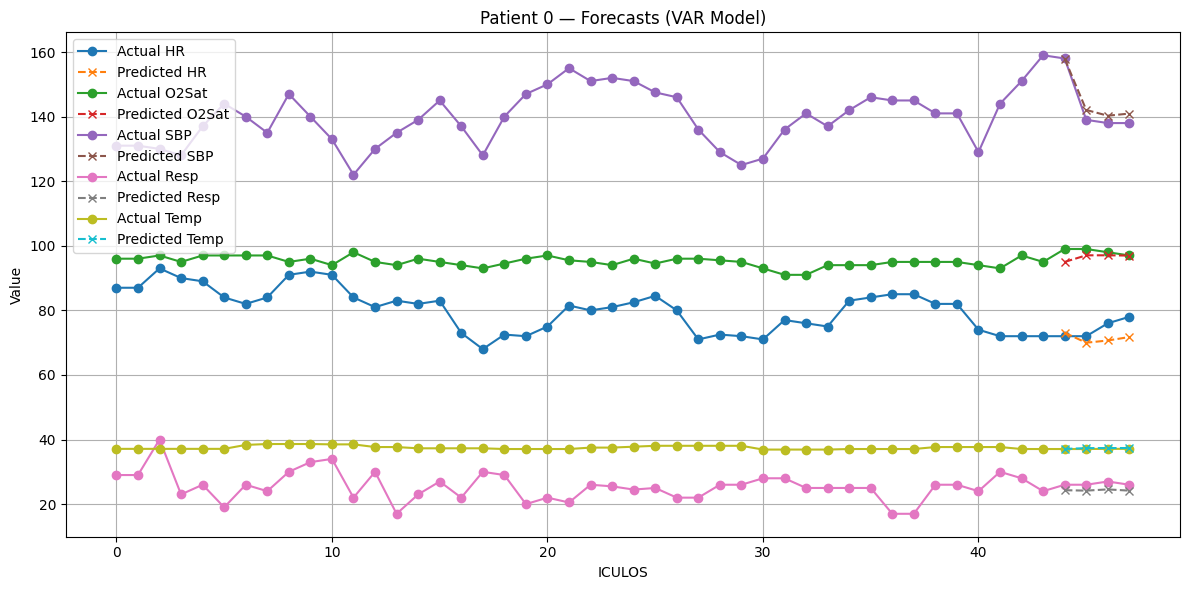

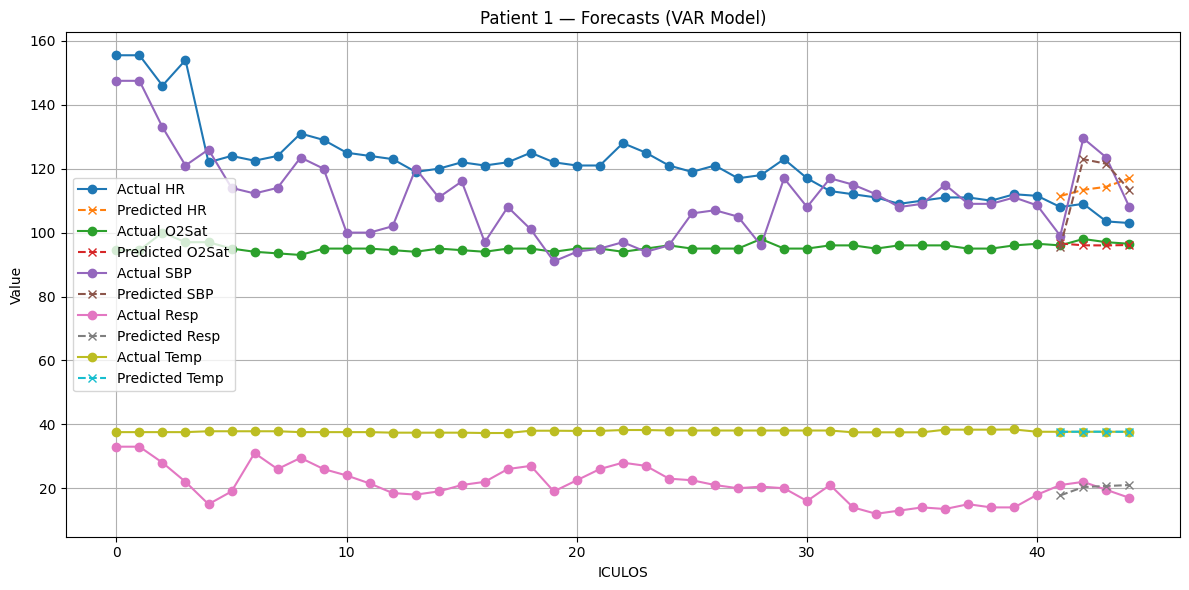

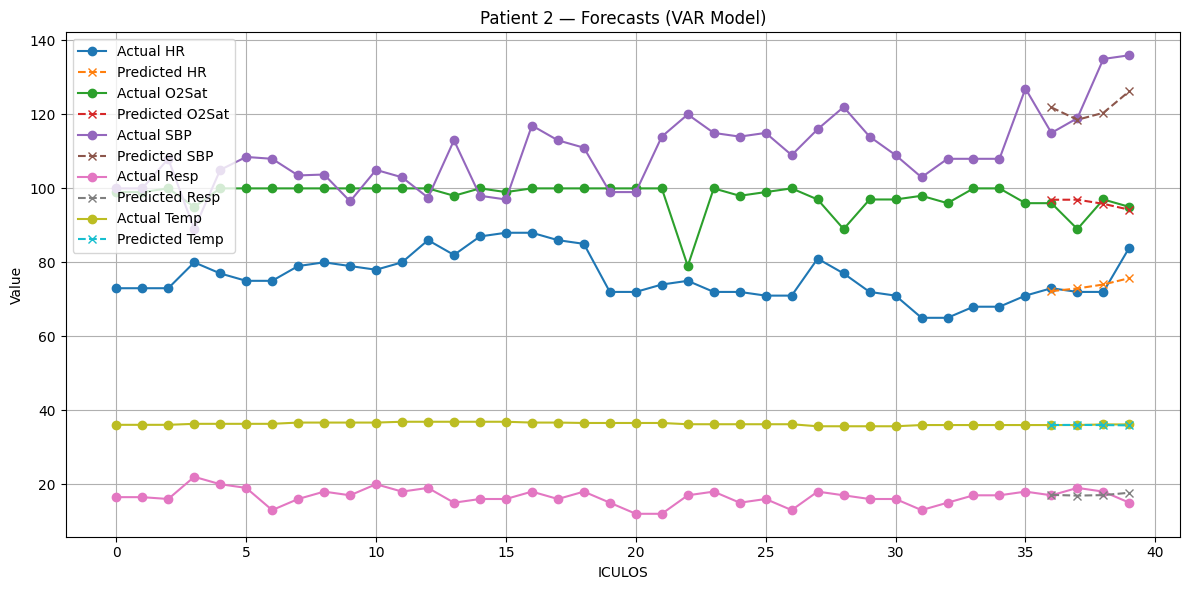

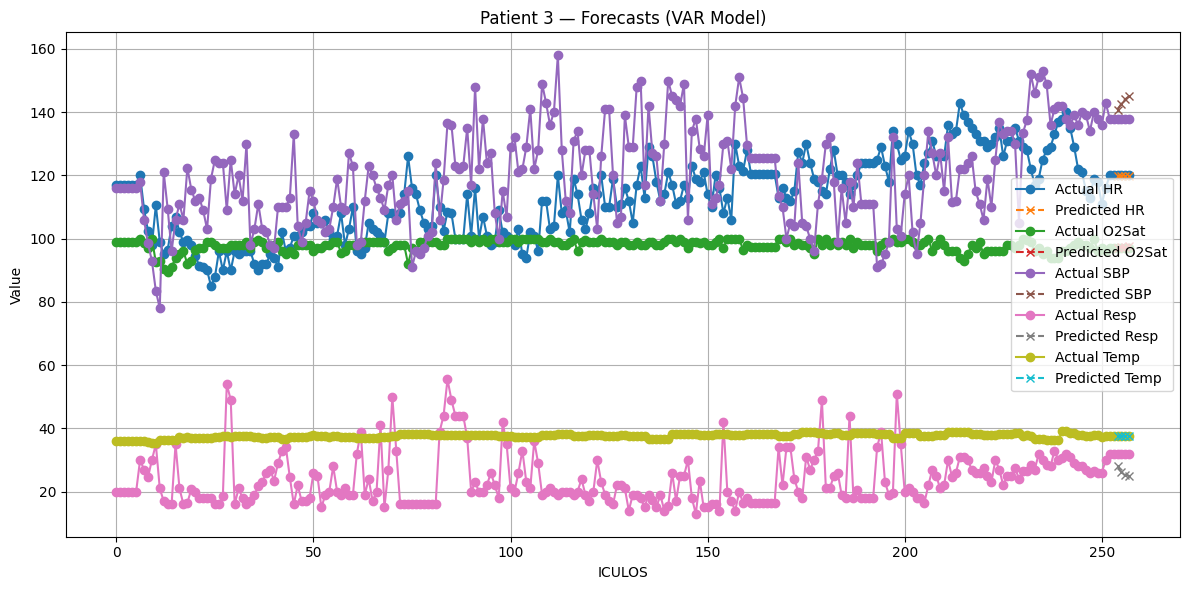

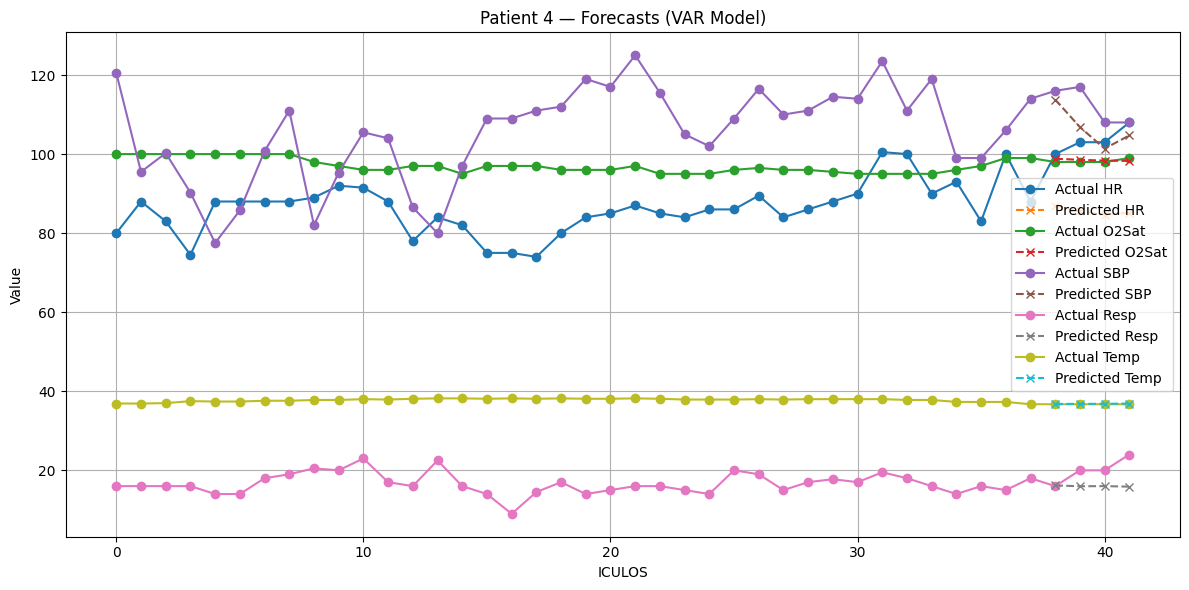

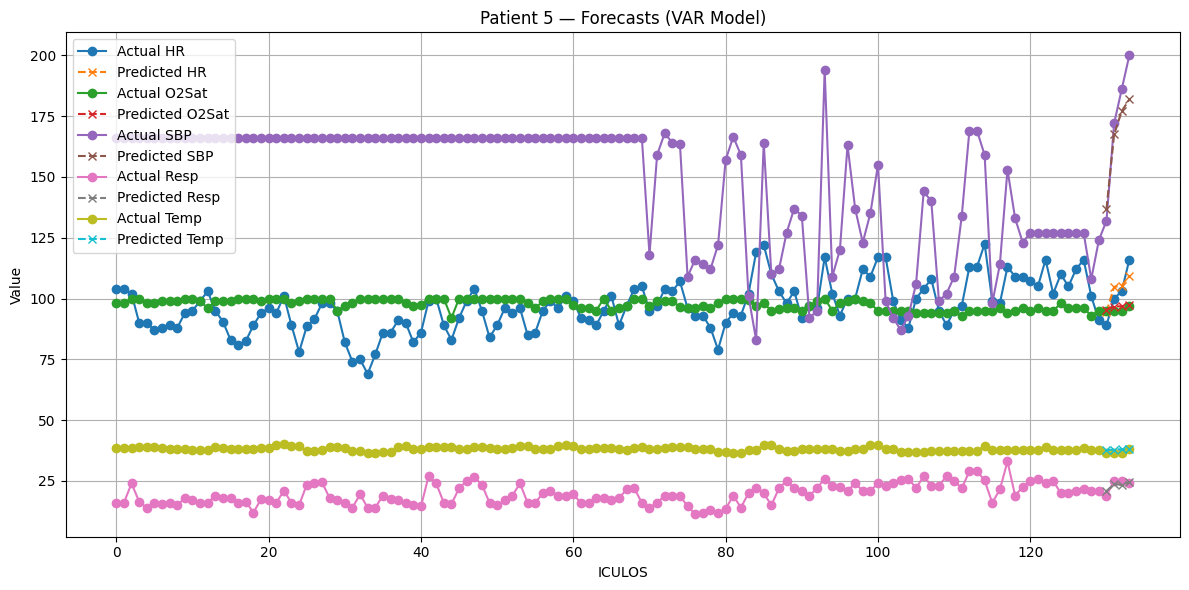

In [5]:
myEvaluator.plot_multivar(5)

In [ ]:
# average iculos length
import numpy as np 